Nama: Renata Aqila Ridha Putri

NIM: 2702244284

Dataset B - Hotel

In [ ]:
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder,MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize
from scipy.stats import pearsonr, spearmanr, shapiro
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

SEED = 123
np.random.seed(SEED)

#### Penjelasan Variable Dataset B (Hotel)

a. Booking_ID = Pengenal unik dari tiap pemesanan

b. no_of_adults = Jumlah orang dewasa

c. no_of_children = Jumlah anak kecil

d. no_of_weekend_nights = Jumlah malam akhir pekan (Sabtu atau Minggu) tamu menginap atau
memesan untuk menginap di hotel

e. no_of_week_nights = Jumlah malam dalam seminggu (Senin hingga Jumat) tamu menginap atau
memesan untuk menginap di hotel

f. type_of_meal_plan = Jenis paket makanan yang dipesan oleh pelanggan  

g. required_car_parking_space = Apakah pelanggan membutuhkan tempat parkir mobil? (0 - Tidak, 1 - Ya)  

h. room_type_reserved = Jenis kamar yang dipesan oleh pelanggan. Nilai-nilai tersebut dienkripsi oleh INN Hotels

i. lead_time = Jumlah hari antara tanggal pemesanan dan tanggal kedatangan

j. arrival_year = Tahun tanggal kedatangan  

k. arrival_month = Bulan tanggal kedatangan

l. arrival_date = Tanggal kedatangan  

m. market_segment_type = Penunjukan segmen pasar

n. repeated_guest = Apakah pelanggan tersebut merupakan tamu yang pernah melakukan booking dan juga menginap? (0 - Tidak, 1 - Ya)  

o. no_of_previous_cancellations = Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan  sebelum pemesanan saat ini  

p. no_of_previous_bookings_not_canceled = Jumlah pemesanan sebelumnya yang tidak dibatalkan
oleh pelanggan sebelum pemesanan saat ini  

q. avg_price_per_room = Harga rata-rata per hari pemesanan; harga kamar bersifat dinamis. (dalam euro)  

r.  no_of_special_requests = Jumlah total permintaan khusus yang dibuat oleh pelanggan (misalnya lantai yang tinggi, pemandangan dari kamar, dan lain-lain.)  

s. booking_status (target variable) = Flag yang menunjukkan apakah pemesanan dibatalkan atau tidak.

## 1. Pre-processing, Learning, Training

In [ ]:
file_path = '/content/Dataset_B_hotel.csv'
df = pd.read_csv(file_path)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Menampilkan 5 baris pertama dari Dataset B Hotel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Menampilkan informasi singkat mengenai nama kolom, jumlah kolom, jumlah data, jumlah nilai non-null di setiap kolom, dan penggunaan memori dataframe pada Dataset B Hotel

In [ ]:
df.shape

(36275, 19)

Menampilkan ukuran dimensi dari df yaitu 36275 baris dan 19 kolom

In [ ]:
df.isna().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,907
required_car_parking_space,1270
room_type_reserved,0
lead_time,0
arrival_year,0


Terdapat beberapa missing value di beberapa variable, seperti di **'type_of_meal_plan'** jumlahnya 907, **'required_car_parking_space'** jumlahnya 1270, dan '**'avg_price_per_room'** jumlahnya 1632

In [ ]:
columns_to_replace = ['type_of_meal_plan', 'required_car_parking_space']
for column in columns_to_replace:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

<ipython-input-11-a26dc993f47d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


Karena **'type_of_meal_plan'** dan **'required_car_parking_space'** itu categorical, kita impute missing valuenya dengan menggunakan nilai modus dari masing-masing variable itu

In [ ]:
columns_to_replace_median = ['avg_price_per_room']

for column in columns_to_replace_median:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

<ipython-input-12-99a1ebff8807>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)


Karena **'avg_price_per_room'**  itu numerical, kita impute missing valuenya dengan menggunakan nilai median dari masing-masing variable itu

In [ ]:
df.isna().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


Setelah kita handle missing valuenya, kita cek kembali dan sudah tidak ada missing value di semua variable

In [ ]:
categorical_cols = []
numerical_cols = []

for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        numerical_cols.append(i)
    else:
        categorical_cols.append(i)

print(f'Categorical: {categorical_cols}')
print(f'Numeric: {numerical_cols}')

Categorical: ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
Numeric: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


Menampilkan 2 kategori yaitu Categorical dan Numerical yang di mana Categorical berisi tipe data yang bukan numerik seperti Booking_ID, type_of_meal_plan dll. Sedangkan Numerical berisi tipe data yang numerik seperti no_of_adults, no_of_children, dll.

In [ ]:
for i in categorical_cols:
    print(df[i].value_counts(),'\n')

Booking_ID
INN36275    1
INN00001    1
INN00002    1
INN36259    1
INN36258    1
           ..
INN00008    1
INN00007    1
INN00006    1
INN00005    1
INN00004    1
Name: count, Length: 36275, dtype: int64 

type_of_meal_plan
Meal Plan 1     28064
Not Selected     4986
Meal Plan 2      3220
Meal Plan 3         5
Name: count, dtype: int64 

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64 

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64 

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64 



Codingan ini untuk menampilkan jumlah kemunculan tiap kategori pada kolom bertipe kategorikal.

In [ ]:
for i in numerical_cols:
    print(df[i].value_counts(),'\n')

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64 

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64 

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64 

no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64 

required_car_parking_space
0.0    35180
1.0     1095
Name: count, dtype: int64 

lead_time
0      1297
1      1078
2       643
3       630
4       628
       ... 
348       1
352       1
328       1
300       1
355       1
Name: count, Length: 352, dtype: int64 

arrival_year
2018    29761
2017     6514
Name: count, dtype: int64 

arrival_month
10    5317
9     4611
8     3813
6     3203

Codingan ini untuk menampilkan jumlah kemunculan tiap kategori pada kolom bertipe numerical.

In [ ]:
df.duplicated().sum()

np.int64(0)

Tidak ada data yang terduplicate di dataset ini

In [ ]:
df[categorical_cols].describe()

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN36275,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,28064,28130,23214,24390


Menampilkan total data, jumlah nilai unik (berbeda), nilai yang paling sering muncul, dan total kemunculan nilai yang paling sering muncul di setiap kolom variabel Categorical

In [ ]:
df[numerical_cols].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030186,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.267375,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.171101,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,34.368399,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,81.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Menampilkan total data, nilai rata-rata, nilai standar deviasi, nilai minimum, nilai kuartil pertama, kedua, dan ketiga serta nilai maksimum di setiap kolom variabel Numerical

In [ ]:
#hapus kolom ID
#df.drop(columns=['Booking_ID'], inplace=True)

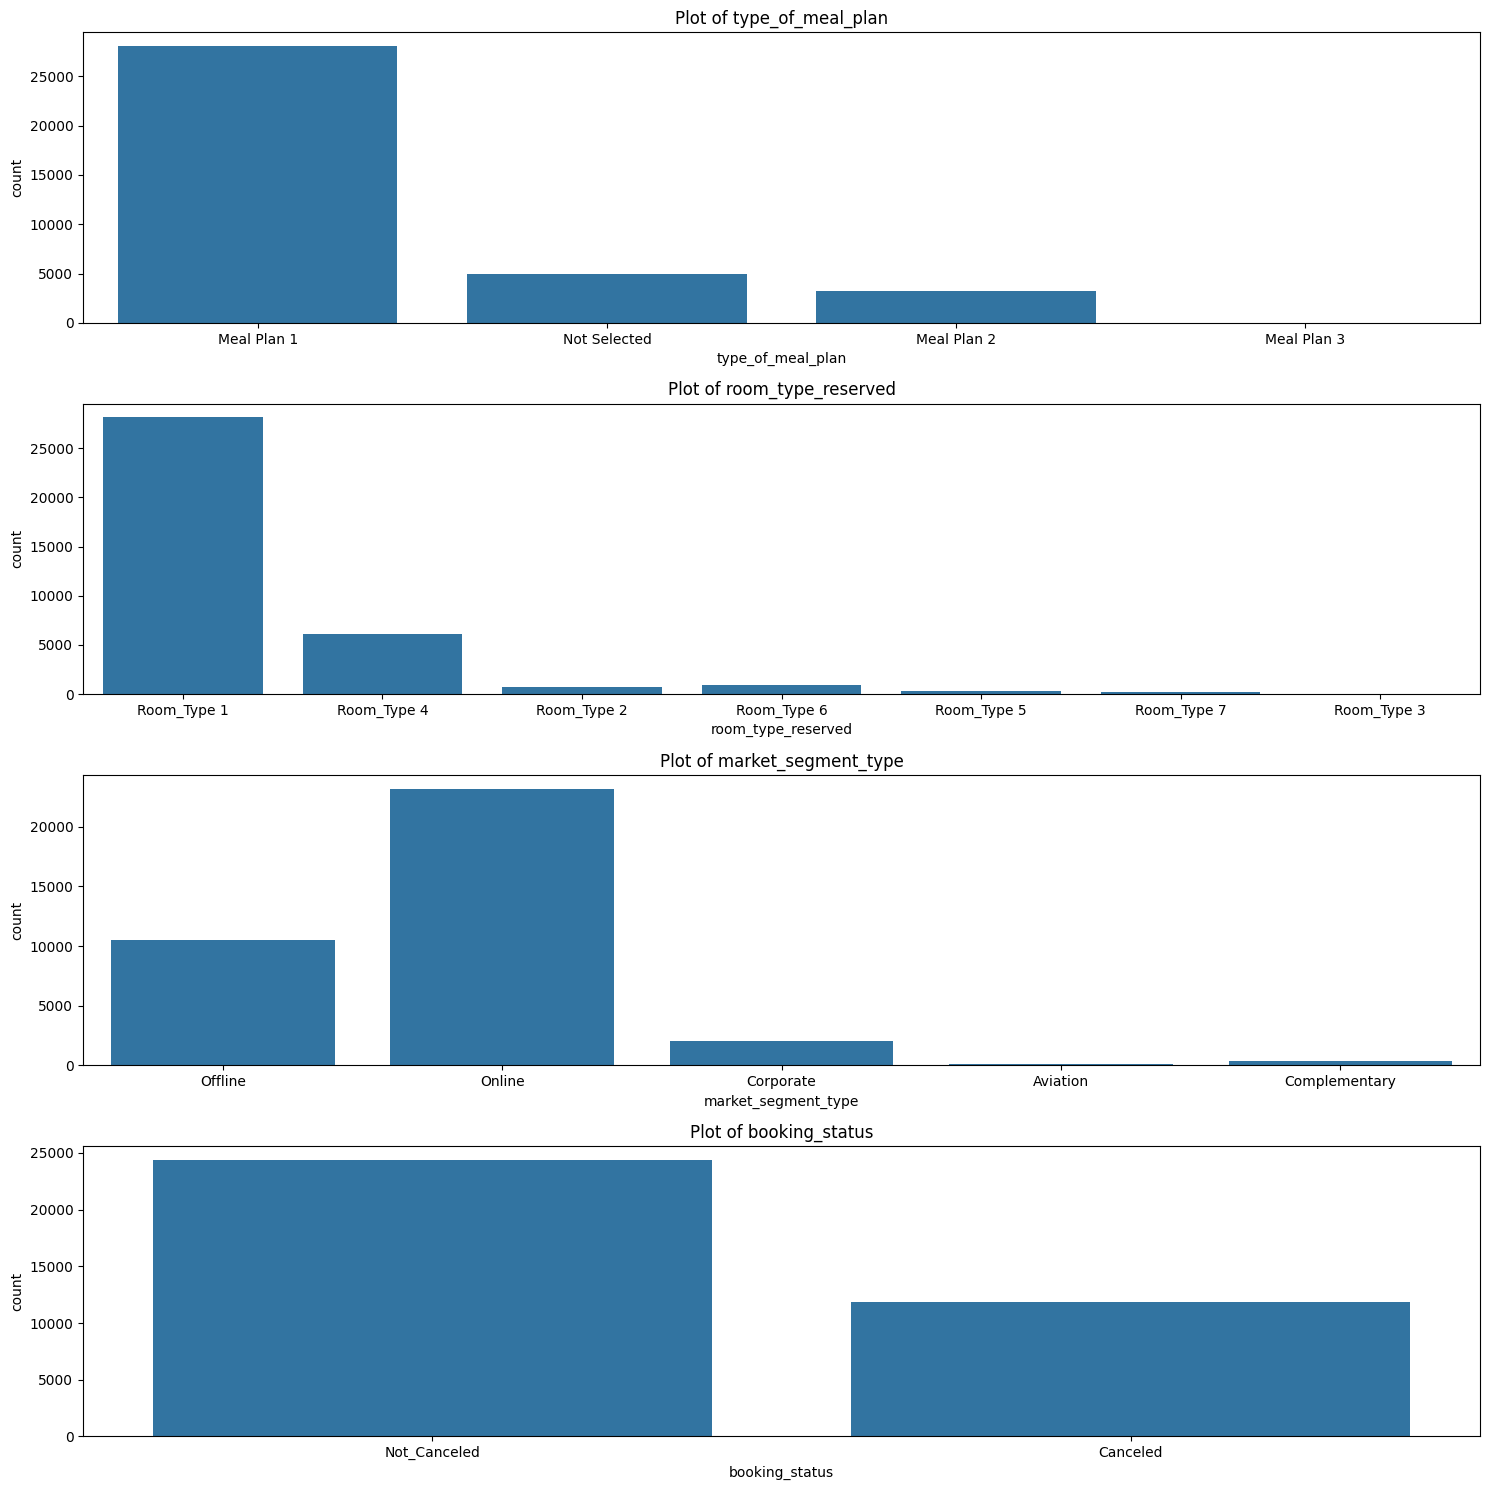

In [ ]:
category = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
fig, axes = plt.subplots(4, 1, figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(category):
    sns.countplot(x = col, data=df, ax=axes[i])
    axes[i].set_title(f'Plot of {col}')

plt.tight_layout()
plt.show()

Menampilkan bar chart dari variable categorical

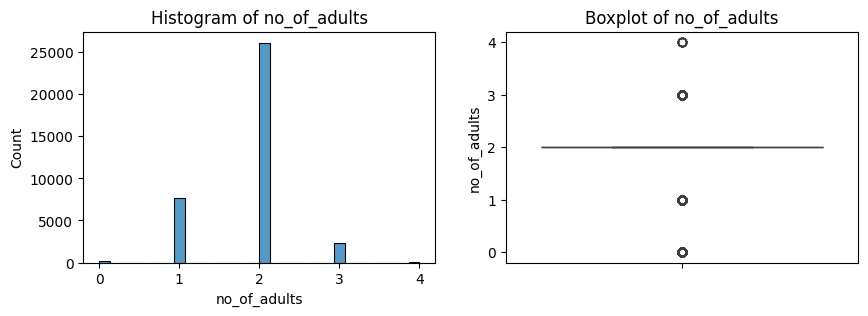

Skewness: -0.3332949302307013
Kurtosis: 0.8148219649541883


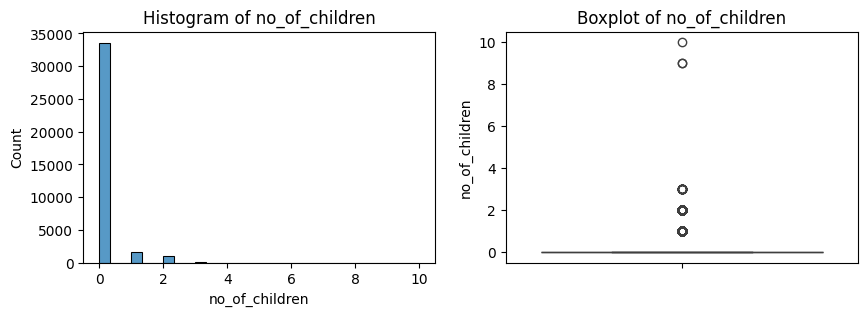

Skewness: 4.710349518506961
Kurtosis: 36.98185590119308


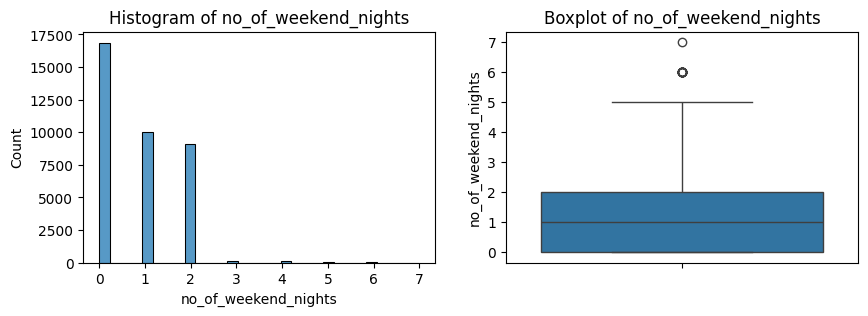

Skewness: 0.7376159576059308
Kurtosis: 0.2988575627243817


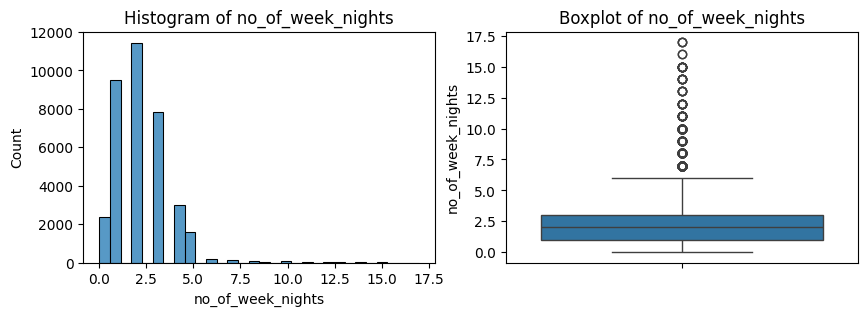

Skewness: 1.5993503651924639
Kurtosis: 7.798283949094243


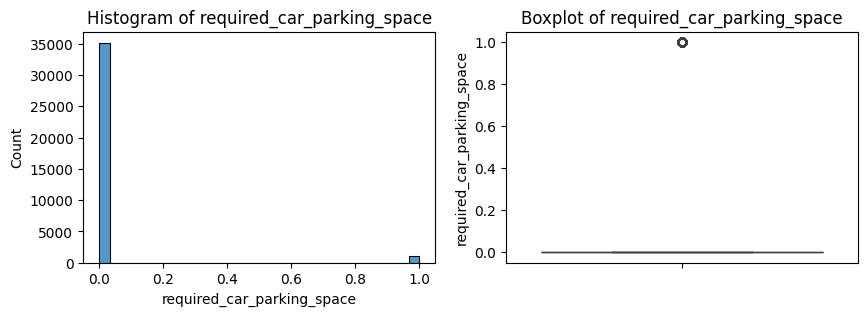

Skewness: 5.4919462761051765
Kurtosis: 28.163026647884887


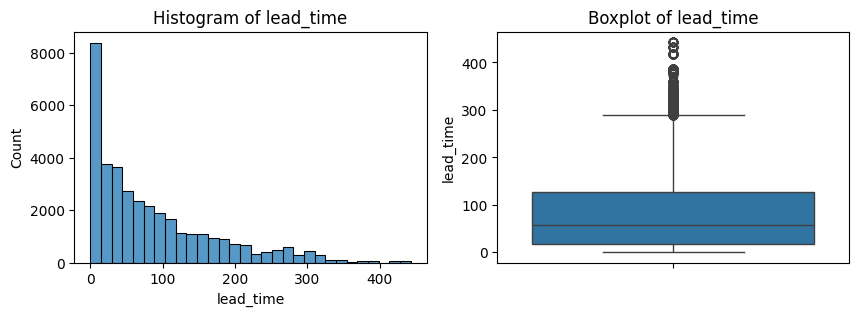

Skewness: 1.2924915330710838
Kurtosis: 1.1795940897790458


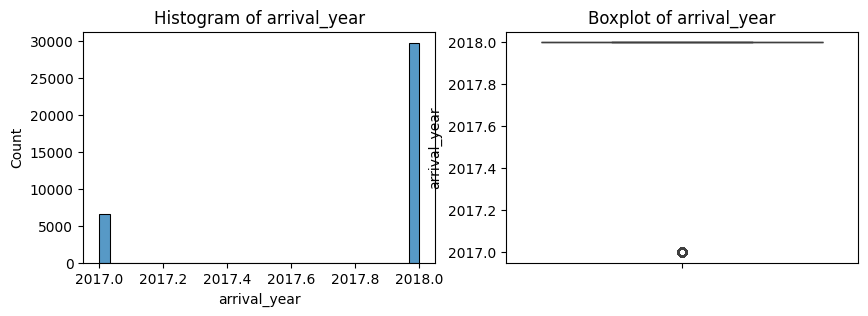

Skewness: -1.6696953495540467
Kurtosis: 0.787925999101224


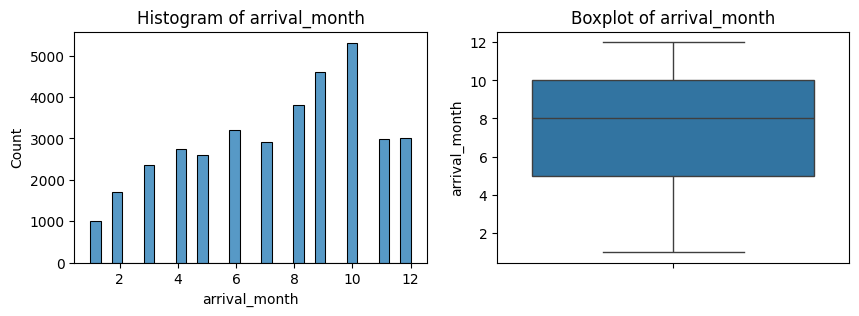

Skewness: -0.34822885187738667
Kurtosis: -0.9331889568857163


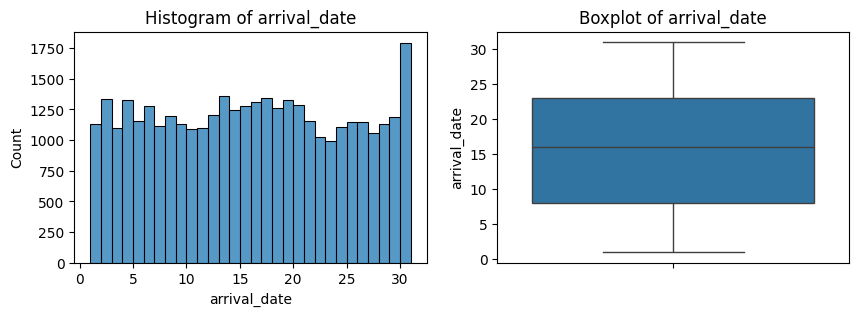

Skewness: 0.028808569139449704
Kurtosis: -1.157213970073237


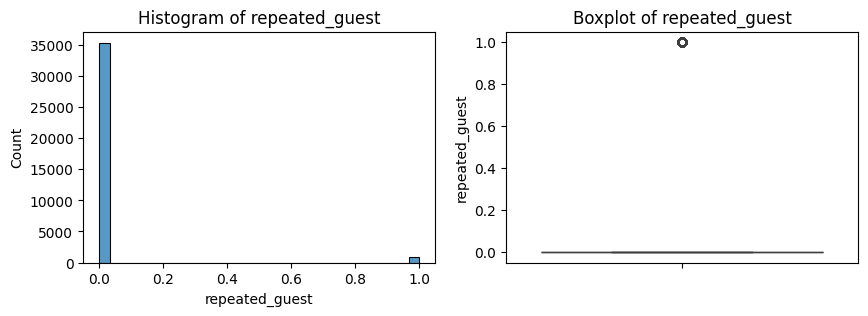

Skewness: 6.002888347093901
Kurtosis: 34.03654508879247


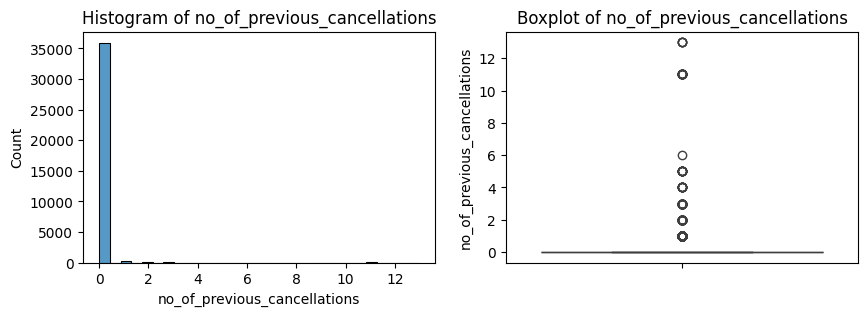

Skewness: 25.199875952075615
Kurtosis: 732.7356755507192


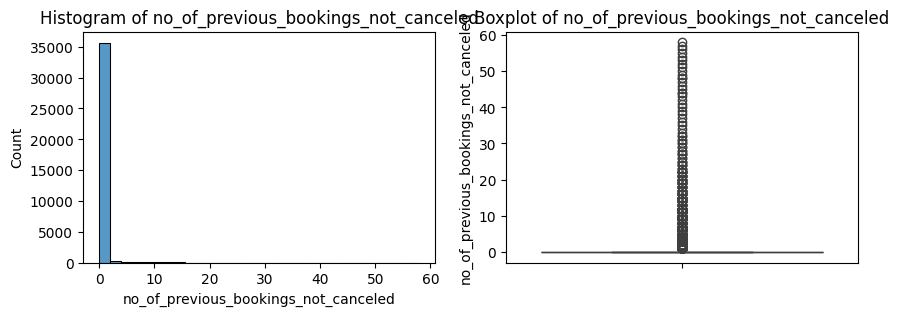

Skewness: 19.250190677395846
Kurtosis: 457.3800851716296


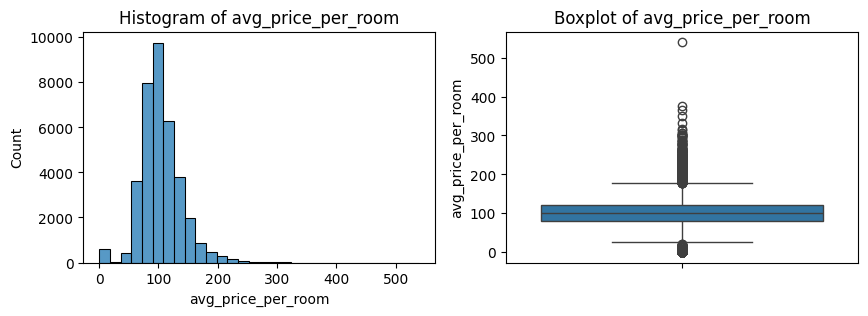

Skewness: 0.695930507342748
Kurtosis: 3.4944696697421995


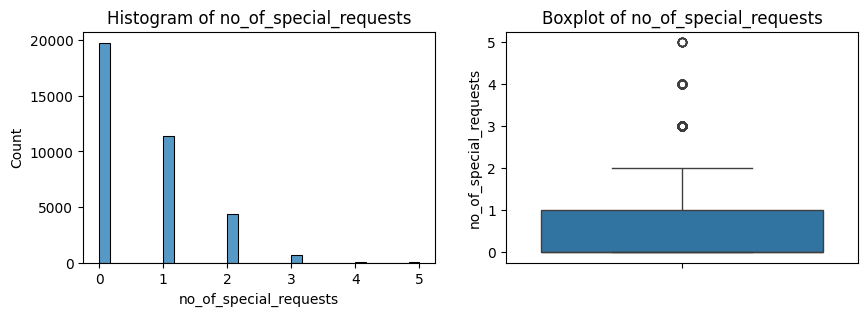

Skewness: 1.145080771394943
Kurtosis: 0.8814370153528488


In [ ]:
numerical = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
def check_distribution_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        #histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title(f'Histogram of {col}')

        #boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())

check_distribution_outliers(df, numerical_cols)

Menampilkan histogram dan boxplot untuk check outlier dari variable numerical

In [ ]:
def detect_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        if not outliers.empty:
            print(f"Outliers in {col}:\n", outliers[[col]].head(), "\n")
        else:
            print(f"No outliers detected in {col}\n")

detect_outliers_iqr(df, numerical_cols)

Outliers in no_of_adults:
     no_of_adults
2              1
8              3
10             1
11             1
13             1 

Outliers in no_of_children:
     no_of_children
32               2
60               2
80               2
95               1
99               2 

Outliers in no_of_weekend_nights:
       no_of_weekend_nights
539                      6
1588                     6
2296                     6
2710                     6
6929                     6 

Outliers in no_of_week_nights:
      no_of_week_nights
194                 10
380                 11
477                  7
539                 15
554                  9 

Outliers in required_car_parking_space:
     required_car_parking_space
35                         1.0
60                         1.0
72                         1.0
84                         1.0
91                         1.0 

Outliers in lead_time:
      lead_time
5          346
96         320
118        443
120        317
170        317 

Outliers

Untuk mendeteksi outlier (nilai ekstrem) pada kolom-kolom numerik dalam sebuah DataFrame df menggunakan metode IQR (Interquartile Range).


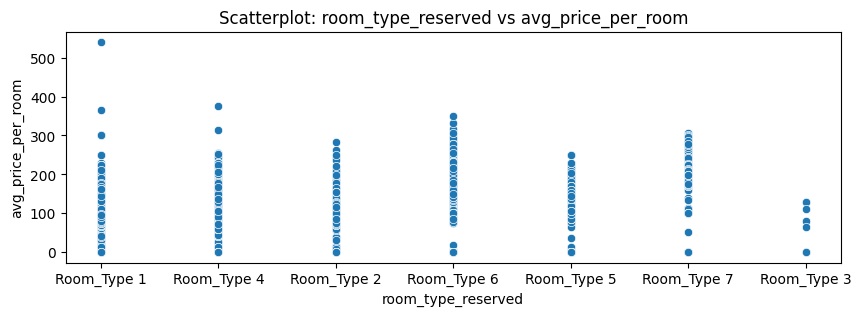

Spearman's R between room_type_reserved and avg_price_per_room: 0.3843 (p-value: 0.0000)
Number of NaNs in room_type_reserved: 0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

def check_correlation(df_in, x_col, y_col):
    df = df_in.copy()
    df = df.dropna(subset=[x_col, y_col])

    plt.figure(figsize=(10, 3))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f'Scatterplot: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

    spearman_corr, p_value = spearmanr(df[x_col], df[y_col])
    print(f"Spearman's R between {x_col} and {y_col}: {spearman_corr:.4f} (p-value: {p_value:.4f})")

    nan_count = df_in[x_col].isna().sum()
    print(f'Number of NaNs in {x_col}: {nan_count}')

check_correlation(df, x_col="room_type_reserved", y_col="avg_price_per_room")

- Spearman's R: 0.3843 → korelasi positif sedang, menunjukkan bahwa ada hubungan monotonic: semakin "tinggi" jenis kamar, cenderung harganya juga lebih mahal.

- p-value: 0.0000 → sangat signifikan secara statistik

- Visual: Harga kamar bervariasi berdasarkan jenis kamar; terlihat beberapa tipe seperti Room_Type 1 dan 4 punya sebaran harga yang cukup tinggi, sementara Room_Type 3 cenderung lebih rendah.

**Train data**

In [ ]:
cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
target_col = 'booking_status'

# numerical without outlier
standard_scale_cols = ['arrival_month', 'arrival_date']

# numerical with outlier
robust_scale_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                     'no_of_week_nights', 'required_car_parking_space', 'lead_time',
                     'arrival_year', 'repeated_guest', 'no_of_previous_cancellations',
                     'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
                     'no_of_special_requests']

Ini untuk define colomns:

- cat_cols: Kolom-kolom kategorikal yang nanti akan di-encode pakai One-Hot Encoding

- target_col: Kolom yang jadi label/target untuk klasifikasi (apakah booking dibatalkan atau tidak)

- standard_scale_cols: Kolom numerik tanpa outlier, akan discale pakai StandardScaler

- robust_scale_cols: Kolom numerik dengan outlier, akan discale pakai RobustScaler



In [ ]:
# Encode target
df[target_col] = df[target_col].map({'Not_Canceled': 0, 'Canceled': 1})

# Split data
X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ubah target booking_status dari string menjadi angka:
- Not_Canceled → 0
- Canceled → 1

Supaya bisa dipakai di model klasifikasi seperti Random Forest, XGBoost

Lalu data displit menjadi 80% training dan 20% testing

X → fitur (semua kolom kecuali target)

y → target (booking_status)



In [ ]:
# One-hot encoding
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
# Scaling
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

X_train[standard_scale_cols] = standard_scaler.fit_transform(X_train[standard_scale_cols])
X_test[standard_scale_cols] = standard_scaler.transform(X_test[standard_scale_cols])

X_train[robust_scale_cols] = robust_scaler.fit_transform(X_train[robust_scale_cols])
X_test[robust_scale_cols] = robust_scaler.transform(X_test[robust_scale_cols])

**Evaluate the model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

print("Performance of the Random Forest Classifier:")
print("Detailed classification report:\n", classification_report(y_test, rf_pred))


Performance of the Random Forest Classifier:
Detailed classification report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      4839
           1       0.88      0.81      0.85      2416

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



**Kesimpulan**
- Model sangat baik mengenali class Not Canceled (0) → Recall tinggi (0.95)

- Untuk class Canceled (1), model cukup bagus, tapi recall lebih rendah (0.81), artinya masih ada false negative

- Overall akurasi 90%, menunjukkan performa sangat baik

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Label encoding untuk target
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Inisialisasi dan training XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=123)
xgb_model.fit(X_train, y_train_encoded)

# Prediksi dan inverse label encoding
xgb_predictions_encoded = xgb_model.predict(X_test)
xgb_predictions_decoded = label_encoder.inverse_transform(xgb_predictions_encoded)

# Evaluasi
print("Performance of the XGBoost classifier:")
print("Detailed classification report:\n", classification_report(y_test, xgb_predictions_decoded))

xgb_accuracy = accuracy_score(y_test, xgb_predictions_decoded)
print(f"XGBoost accuracy: {xgb_accuracy * 100:.2f}%")


Performance of the XGBoost classifier:
Detailed classification report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4839
           1       0.87      0.80      0.83      2416

    accuracy                           0.89      7255
   macro avg       0.89      0.87      0.88      7255
weighted avg       0.89      0.89      0.89      7255

XGBoost accuracy: 89.24%


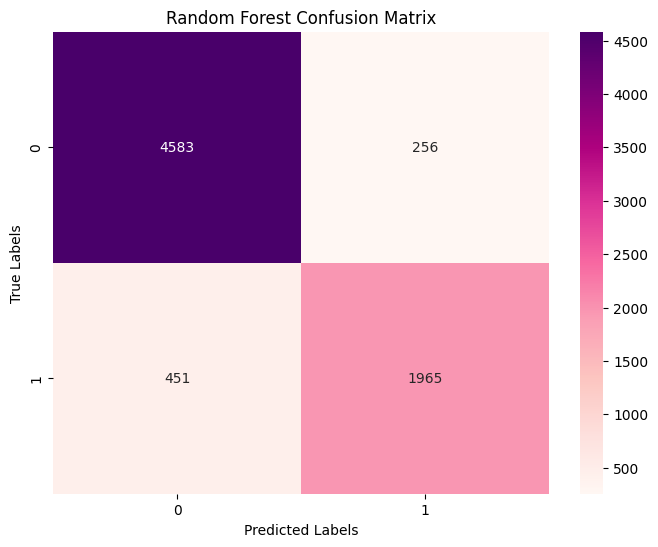

Random Forest ROC-AUC Score: 0.9594


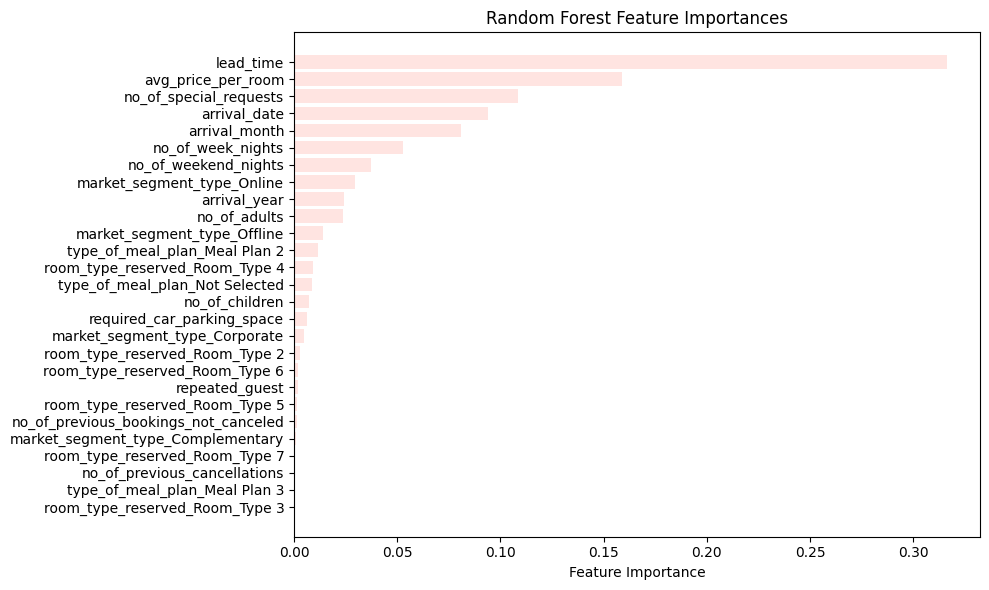

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Prediksi
rf_pred = rf_classifier.predict(X_test)

# Confusion matrix Random Forest
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdPu",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC-AUC score
rf_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print(f"Random Forest ROC-AUC Score: {rf_auc:.4f}")

# Feature importance plot
import numpy as np

feature_importances = rf_classifier.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx], color='mistyrose')
plt.title("Random Forest Feature Importances")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


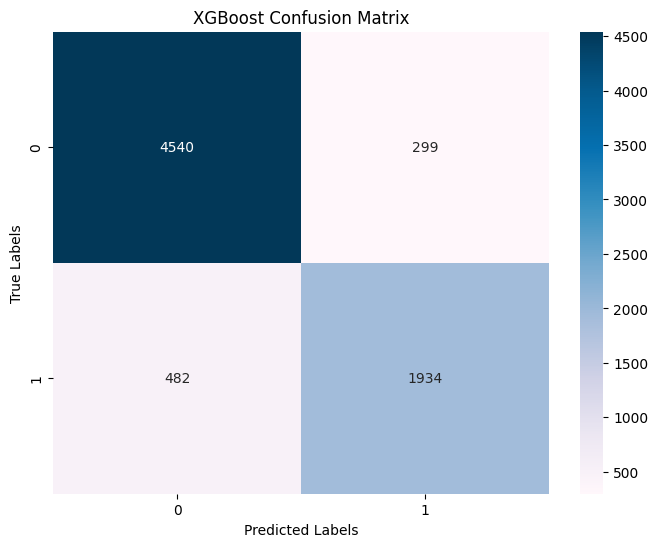

XGBoost ROC-AUC Score: 0.9565


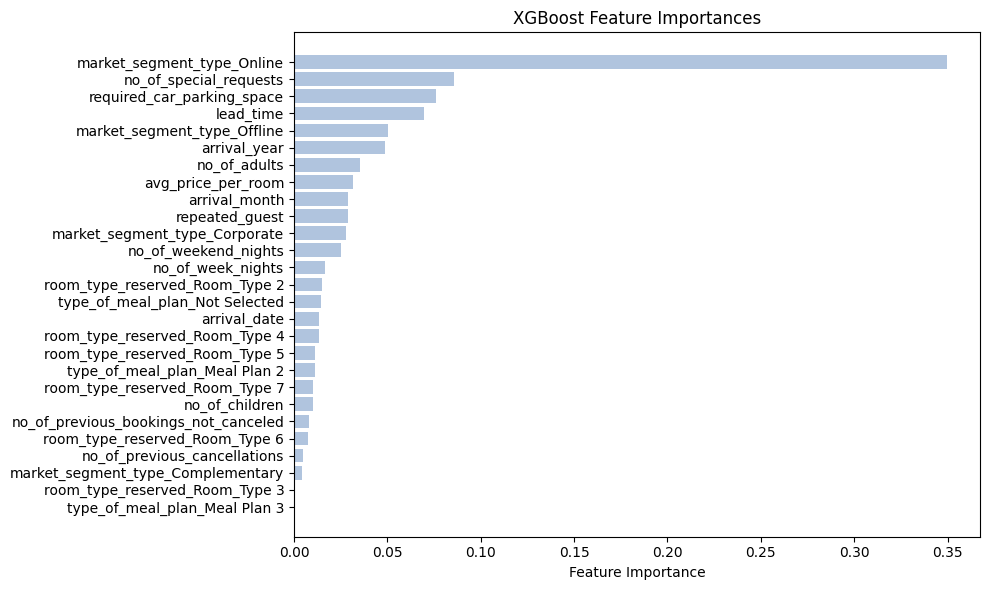

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score

# Encoding target (pastikan label_encoder sudah di-fit sebelumnya)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Fit model (jika belum)
xgb_model.fit(X_train, y_train_encoded)

# Predict
xgb_pred_encoded = xgb_model.predict(X_test)
xgb_pred = label_encoder.inverse_transform(xgb_pred_encoded)

# Confusion matrix XGBoost
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt="d", cmap="PuBu",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("XGBoost Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC-AUC score (gunakan probabilitas kelas 1)
xgb_auc = roc_auc_score(y_test_encoded, xgb_model.predict_proba(X_test)[:, 1])
print(f"XGBoost ROC-AUC Score: {xgb_auc:.4f}")

# Feature importance
xgb_feature_importances = xgb_model.feature_importances_
sorted_idx_xgb = xgb_feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx_xgb], xgb_feature_importances[sorted_idx_xgb], color='lightsteelblue')
plt.title("XGBoost Feature Importances")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


Codingan ini untuk mengetahui:

- Confusion Matrix ->	mengetahui distribusi benar atau salah prediksi

- ROC-AUC Score ->	mengukur kekuatan klasifikasi secara menyeluruh

- Feature Importance -> mengetahui fitur mana yang paling menentukan hasil klasifikasi

Karena hasil Random Forest ROC-AUC adalah **0.9594** dan hasil XGBoost ROC-AUC adalah **0.9565**, artinya:
- Model Random Forest sangat akurat dalam membedakan apakah sebuah booking akan dibatalkan atau tidak


**Comparison between Random Forest and XGBoost Algorithm**

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print("Model accuracy comparison:")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

Model accuracy comparison:
Random Forest Accuracy: 90.25%
XGBoost Accuracy: 89.24%


**Explanation**

- Accuracy Score (Skor Akurasi): Dalam hal prediksi yang akurat, model dengan akurasi yang lebih tinggi dianggap lebih unggul.

- Classification Report (Laporan Klasifikasi): Laporan ini memuat nilai precision, recall, dan F1-score untuk setiap kelas. Precision dan recall menunjukkan performa model pada masing-masing kelas, sementara F1-score memberikan penilaian yang seimbang antara keduanya.

- Confusion Matrix (Matriks Kebingungan): Menunjukkan proporsi prediksi yang diklasifikasikan dengan benar maupun salah.

- ROC-AUC Score: Skor ROC-AUC yang lebih tinggi menunjukkan kemampuan model yang lebih baik dalam membedakan antara kelas.

- Feature Importance (Pentingnya Fitur): Menunjukkan fitur-fitur mana yang paling berpengaruh terhadap prediksi yang dibuat oleh model.

**Summary**

- Akurasi Random Forest: 90.25%

- Akurasi XGBoost: 89.24%

Dengan selisih 1.01%, Random Forest menunjukkan performa yang sedikit lebih baik dibandingkan XGBoost dalam mengklasifikasikan data pada dataset ini.

**Kesimpulan**

Untuk tugas klasifikasi, **Random Forest** merupakan model baseline yang kuat dan sering memberikan hasil baik dalam berbagai kondisi. Di sisi lain, **XGBoost** adalah model yang sangat powerful, terutama untuk data yang terstruktur atau tabular, karena menggunakan teknik gradient boosting yang berfokus pada memperbaiki kesalahan dari pohon sebelumnya.

Namun, dalam perbandingan kali ini, **Random Forest sedikit lebih unggul dibandingkan XGBoost**.